## Importing Tensorflow libarary 

In [25]:
import tensorflow as tf

In [26]:
# Initialising the CNN
model = tf.keras.models.Sequential()

## Adding cnn layer

In [27]:
# 32 feature detectors with 3*3 dimensions so the convolution layer compose of 32 feature maps
# 128 by 128 dimensions with colored image(3 channels)  (tensorflow backend)
input_size = (128, 128)
model.add(tf.keras.layers.Convolution2D(32, 3, 3, input_shape = (*input_size, 3), activation = 'relu'))

## Adding pooling layer


In [28]:
# reduce the size of feature maps and therefore reduce the number of nodes in the future fully connected layer (reduce time complexity, less compute intense without losing the performace). 2 by 2 deminsion is the recommended option
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))

##  Adding cnn with pooling layer

In [29]:
model.add(tf.keras.layers.Convolution2D(32, 3, 3, activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))


## Adding flatenning layer

In [30]:
# flatten all the feature maps in the pooling layer into single vector
model.add(tf.keras.layers.Flatten())

## Adding a fully connected layer

In [31]:
# making classic ann which compose of fully connected layers
# number of nodes in hidden layer (output_dim) (common practice is to take the power of 2)
model.add(tf.keras.layers.Dense(units = 64, activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

## Compiling the model

In [32]:
# Compiling the CNN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

## Fitting the cnn to the images

In [58]:
# image augmentation technique to enrich our dataset(training set) without adding more images so get good performance  results with little or no overfitting even with the small amount of images
# used from keras documentation 

from keras.preprocessing.image import ImageDataGenerator
batch_size = 32
# image augmentation part
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

# create training set
# wanna get higher accuracy -> inccrease target_size
training_set = train_datagen.flow_from_directory('/content/CNN-for-image-Classification/dataset/training_set',
                                                 target_size = input_size,
                                                 batch_size = batch_size,
                                                 class_mode = 'binary')

# create test set
# wanna get higher accuracy -> inccrease target_size
test_set = test_datagen.flow_from_directory('/content/CNN-for-image-Classification/dataset/test_set',
                                            target_size = input_size,
                                            batch_size = batch_size,
                                            class_mode = 'binary')

# fit the cnn model to the trainig set and testing it on the test set
model.fit(training_set,
          steps_per_epoch = 8000/batch_size,
          epochs = 35,
          validation_data = test_set,
          validation_steps = 2000/batch_size)

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.
Epoch 1/35
250/250 [==============================] - 44s 170ms/step - loss: 0.6903 - accuracy: 0.5250 - val_loss: 0.6797 - val_accuracy: 0.5630
Epoch 2/35
250/250 [==============================] - 41s 164ms/step - loss: 0.6698 - accuracy: 0.5849 - val_loss: 0.6492 - val_accuracy: 0.6235
Epoch 3/35
250/250 [==============================] - 41s 163ms/step - loss: 0.6539 - accuracy: 0.6118 - val_loss: 0.6390 - val_accuracy: 0.6310
Epoch 4/35
250/250 [==============================] - 41s 163ms/step - loss: 0.6272 - accuracy: 0.6455 - val_loss: 0.6093 - val_accuracy: 0.6685
Epoch 5/35
250/250 [==============================] - 41s 164ms/step - loss: 0.6047 - accuracy: 0.6771 - val_loss: 0.6171 - val_accuracy: 0.6530
Epoch 6/35
250/250 [==============================] - 43s 172ms/step - loss: 0.5874 - accuracy: 0.6917 - val_loss: 0.5676 - val_accuracy: 0.7005
Epoch 7/35
250/250 [==========================

## Making new predictions

In [60]:
import numpy as np
from keras.preprocessing import image

In [61]:
test_image = image.load_img('/content/CNN-for-image-Classification/dataset/single_prediction/cat_or_dog_4.jpg', target_size= input_size)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

1/1 [==============================] - 0s 17ms/step


In [62]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

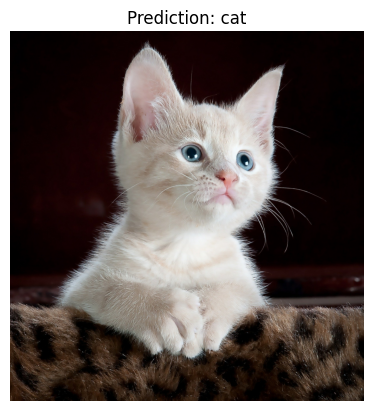

In [64]:
import matplotlib.pyplot as plt

import matplotlib.image as mpimg



# Assuming 'result' is your prediction result

if result[0][0] == 0:

    prediction = 'dog'

    image_path = 'dog_image.jpg'  # Path to the dog image

else:

    prediction = 'cat'

    image_path = 'cat_image.jpg'  # Path to the cat image



# Display the image

img = mpimg.imread('/content/CNN-for-image-Classification/dataset/single_prediction/cat_or_dog_4.jpg')

plt.imshow(img)

plt.title(f'Prediction: {prediction}')

plt.axis('off')  # Turn off axis

plt.show()

In [66]:
prediction

'cat'